# Latent Dirichlet Allocation

In [29]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abize\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
#pip install wordcloud

In [82]:
#pip install --upgrade pip

In [83]:
#pip install wordcloud

In [34]:
pd.__version__

'1.2.4'

In [35]:
data = pd.read_csv('data', sep=",", header=None)
data.columns = ['text']
data.head()

,text
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...
4,From: vzhivov@superior.carleton.ca (Vladimir Z...


## Implémentation LDA
### Le code complet est disponible sous forme de notebook Jupyter sur GitHub

### Chargement des données
### Nettoyage des données
### Analyse exploratoire
### Préparation des données pour l'analyse LDA
### Formation sur le modèle LDA
### Analyse des résultats du modèle LDA

In [36]:
string = "From: etiennecombe@gmail.etu.com Bonjour, je suis Michel"
re.sub("\S+@\S+", " ", string)

'From:   Bonjour, je suis Michel'

In [37]:
data["text"]

0       From: gld@cunixb.cc.columbia.edu (Gary L Dare)...
1       From: atterlep@vela.acs.oakland.edu (Cardinal ...
2       From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...
3       From: atterlep@vela.acs.oakland.edu (Cardinal ...
4       From: vzhivov@superior.carleton.ca (Vladimir Z...
                              ...                        
1194    From: jerryb@eskimo.com (Jerry Kaufman)\nSubje...
1195    From: golchowy@alchemy.chem.utoronto.ca (Geral...
1196    From: jayne@mmalt.guild.org (Jayne Kulikauskas...
1197    From: sclark@epas.utoronto.ca (Susan Clark)\nS...
1198    From: lmvec@westminster.ac.uk (William Hargrea...
Name: text, Length: 1199, dtype: object

The data is a collection of emails that are not labelled. Let's try extract topics from them!

## Preprocessing 

👇 You're used to it by now... Clean up! Store the cleaned text in a new dataframe column "clean_text".

In [ ]:
list_stopwords = ['Subject']

In [114]:
def preproccessing(series: pd.Series):
    for i in range(len(series)):
        review = re.sub("\S+@\S+"," ", series[i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove("not")
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        series[i] = review
    #print(series[i])
    return series
data_clean=preproccessing(data['text'])

In [115]:
data_clean

0       from: (gari l dare) subject: stan fischler, 4/...
1       from: (cardin ximenez) subject: re: arrog chri...
2       from: subject: re: ancient book organization: ...
3       from: (cardin ximenez) subject: atheist hell o...
4       from: (vladimir zhivov) subject: flame truli b...
                              ...                        
1194    from: (jerri kaufman) subject: re: prayer advi...
1195    from: (gerald olchowy) subject: re: pat burn ....
1196    from: (jayn kulikauskas) subject: qualiti cath...
1197    from: (susan clark) subject: pick first? organ...
1198    from: (william hargreaves) subject: re: help o...
Name: text, Length: 1199, dtype: object

In [12]:
type(data_clean)

pandas.core.series.Series

In [87]:
data_clean.to_csv(r'data_clean.csv', index = False)

In [116]:
print(data_clean.isna().sum())

0


## Latent Dirichlet Allocation model

👇 Train an LDA model to extract potential topics.

In [117]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
X = model.fit_transform(data_clean)
lda = LatentDirichletAllocation(n_components=50, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=50, random_state=42)

In [118]:
X.shape

(1199, 18874)

In [103]:
#model.get_feature_names()

In [106]:
lda.components_

array([[0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       [0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       [0.76523315, 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       ...,
       [0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       [0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       [0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ]])

In [119]:
test = []
for topic in lda.components_:
    dict_ = dict(zip(model.get_feature_names(), topic))
    dict_ = dict(sorted(dict_.items(), key=lambda item: item[1], reverse= True))    
    test.append(dict(list(dict_.items())[0:10]))

C:\Users\Abize\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [120]:
test

[{'huot': 1.3836061208332013,
  'cray': 1.3502319990939753,
  'norm': 0.9940262927835092,
  'franchi': 0.8782982919993,
  'minnesota': 0.8184415771841715,
  'whatta': 0.7732964715180305,
  'minut': 0.754381182526269,
  'pittpa': 0.701803060414636,
  '_____________________________________________________________________________': 0.6841393488344164,
  'riddance': 0.656236075478749},
 {'hammerl': 1.735637272217437,
  'valeri': 1.7334151183458146,
  'captain': 1.2632146471910937,
  'sabbath': 1.1567396668888492,
  'black': 1.0595466460233538,
  'idacom': 0.9371362092247941,
  'band': 0.7915678567204457,
  'acsu': 0.766258846107942,
  'ub': 0.766258846107942,
  'pressure': 0.7533746692178439},
 {'chant': 1.3776990208618027,
  'keenan': 0.8154259330292227,
  'khan': 0.7716863691449067,
  'mohammad': 0.7716863691449067,
  'lyrics': 0.7613324315802434,
  'passion': 0.6147793801319614,
  'neilsen': 0.5111389610690978,
  'handl': 0.48619303270014974,
  'enmiti': 0.4744405535118272,
  'fundament

In [121]:
for i, topic in zip(range(len(test)), test):
    print(f"Topic {i}:", list(topic.keys()))

Topic 0: ['huot', 'cray', 'norm', 'franchi', 'minnesota', 'whatta', 'minut', 'pittpa', '_____________________________________________________________________________', 'riddance']
Topic 1: ['hammerl', 'valeri', 'captain', 'sabbath', 'black', 'idacom', 'band', 'acsu', 'ub', 'pressure']
Topic 2: ['chant', 'keenan', 'khan', 'mohammad', 'lyrics', 'passion', 'neilsen', 'handl', 'enmiti', 'fundamentalist']
Topic 3: ['ist', 'ists', 'laboratory', 'stpl', 'terresteri', 'solar', 'rebuild', 'ulf', 'levit', 'samuelson']
Topic 4: ['discussion', 'tonight', 'klingon', 'hirji', 'rahim', 'easter', 'close', 'godfather', 'before', 'target']
Topic 5: ['easier', 'plymouth', 'marida', 'destroy', 'motorola', 'jon', '129', '632', '708', 'hawk']
Topic 6: ['clement', 'tickets', 'messier', 'angelo', 'pleshar', 'irvin', 'color', 'dick', 'scalper', 'faq']
Topic 7: ['grass', 'valley', 'chuck', 'daili', 'petch', 'ver', 'ca', 'armstrong', 'stan', 'revel']
Topic 8: ['easter', 'celebr', 'chelio', 'wa', 'zazula', 'harol

## Visualize potential topics

👇 The function to print the words associated with the potential topics is already made for you. You just have to pass the correct arguments!

In [112]:
#! pip install wordcloud

In [122]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(test, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(test))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(test)
show_wordcloud(test)

ModuleNotFoundError: No module named 'wordcloud'

## Predict topic of new text

👇 You can now use your LDA model to predict the topic of a new text. First, use your vectorizer to vectorize the example. Then, use your LDA model to predict the topic of the vectorized example.

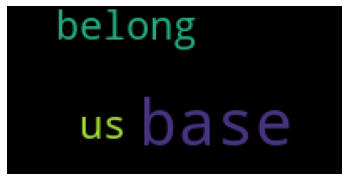

In [24]:
## Simple WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text_teste = 'all your base are belong to us all of your base base base'

def generate_wordcloud(text_teste): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(
    font_path=None,
    width=200,
    height=100,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(text)

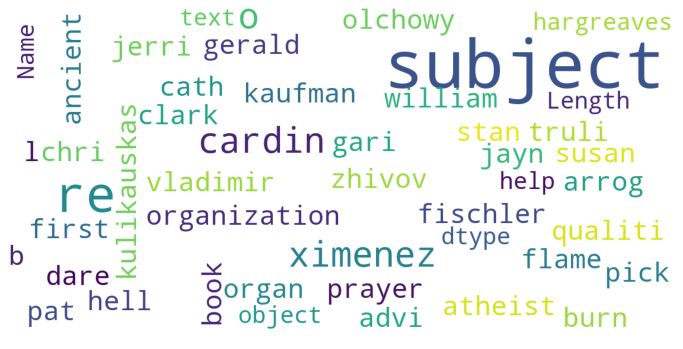

In [28]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data_clean, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data_clean))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(data_clean, title = None)